In [1]:
%load_ext autoreload
%autoreload 2

In [45]:
import datetime
from datetime import date, timezone, timedelta
import pandas as pd
import numpy as np
import utils
import yfinance as yf
from spreads_prep import spreads_prep
from backtest import backtest
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import time

In [46]:
tk = 'SPY'
op, st = utils.prep_op_st_df(_ticker = tk)
spread_prep = spreads_prep(op, st)

for d in [300]:
    options = spread_prep.df_aligned
#     calls.to_csv('Spreads_Data\\' + tk + '\\DTE'+ str(d)+ '_' + tk +'_calls_2010_2022.csv')
#     puts.to_csv('Spreads_Data\\' + tk + '\\DTE'+ str(d)+ '_' + tk +'_puts_2010_2022.csv')
    # For Mac, Use: 
#     calls.to_csv('Spreads_Data/' + tk + '/DTE'+ str(d)+ '_' + tk +'_calls_2010_2022.csv')
#     puts.to_csv('Spreads_Data/' + tk + '/DTE'+ str(d)+ '_' + tk +'_puts_2010_2022.csv')

C:\Users\27270\Option_Spreads_Backtesting\utils.py:68: DtypeWarning: Columns (9,10,11,12,13,16,18,19,21,22,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


[*********************100%***********************]  1 of 1 completed
Start date: 2010-01-01
End date: 2022-12-31
Done Cleaning Data! CPU time: 7.97 seconds, Total time: 14.94 seconds
Done Calculating Probability! CPU time: 2.16 seconds, Total time: 6.76 seconds


In [3]:
op

,QUOTE_TIME_EST,EXPIRE_EST,STRIKE,DTE,C_IV,C_BID,C_ASK,P_IV,P_BID,P_ASK
0,2010-01-04,2010-01-15,55.0,11.0,2.935300,58.200000,58.400000,1.367420,0.000000,0.020000
1,2010-01-04,2010-01-15,56.0,11.0,2.833570,57.200000,57.400000,1.334760,0.000000,0.010000
2,2010-01-04,2010-01-15,57.0,11.0,2.735830,56.200000,56.390000,1.306550,0.000000,0.010000
3,2010-01-04,2010-01-15,58.0,11.0,2.640920,55.190000,55.400000,1.272370,0.000000,0.030000
4,2010-01-04,2010-01-15,59.0,11.0,2.549920,54.200000,54.400000,1.244210,0.000000,0.020000
...,...,...,...,...,...,...,...,...,...,...
8496417,2022-12-30,2025-12-19,630.0,1085.0,0.177700,0.59,10.0,,243.0,250.5
8496418,2022-12-30,2025-12-19,635.0,1085.0,0.173040,2.0,7.0,0.295570,247.66,257.5
8496419,2022-12-30,2025-12-19,640.0,1085.0,0.175580,2.0,7.0,0.302890,253.0,262.5
8496420,2022-12-30,2025-12-19,645.0,1085.0,0.182390,0.12,10.0,0.306990,258.0,267.5


In [47]:
options_test = options.copy()
options_test['op_id'] = list(zip(options_test.EXPIRE_EST, options_test.STRIKE))

In [48]:
options_test = options_test.loc[options_test.QUOTE_TIME_EST >= datetime.date(year = 2018, month =1, day = 4)]

In [49]:
a = options_test.loc[options_test.QUOTE_TIME_EST == datetime.date(year = 2021, month =12, day = 31)]
a.sort_values(by = 'DTE', ascending = False)
a[a.DTE == 350].head()

,QUOTE_TIME_EST,EXPIRE_EST,STRIKE,DTE,C_IV,C_BID,C_ASK,P_IV,P_BID,P_ASK,PRICE@EXPIRE,CURRENT_PRICE,STRIKE_DISTANCE,P_ATM_IV,C_ATM_IV,P_ITM_PROB,C_ITM_PROB,P_OTM_PROB,C_OTM_PROB,op_id
6362930,2021-12-31,2022-12-16,85.0,350.0,2.34981,388.24,391.98,0.69776,0.24,0.26,383.269989,474.959991,389.959991,0.08376,0.0699,0.0,1.0,1.0,0.0,"(2022-12-16, 85.0)"
6362931,2021-12-31,2022-12-16,105.0,350.0,1.80818,368.31,371.99,0.65253,0.32,0.53,383.269989,474.959991,369.959991,0.08376,0.0699,0.0,1.0,1.0,0.0,"(2022-12-16, 105.0)"
6362932,2021-12-31,2022-12-16,135.0,350.0,1.29273,338.23,341.95,0.58223,0.67,0.70,383.269989,474.959991,339.959991,0.08376,0.0699,0.0,1.0,1.0,0.0,"(2022-12-16, 135.0)"
6362933,2021-12-31,2022-12-16,140.0,350.0,1.22954,333.25,337.00,0.57222,0.73,0.74,383.269989,474.959991,334.959991,0.08376,0.0699,0.0,1.0,1.0,0.0,"(2022-12-16, 140.0)"
6362934,2021-12-31,2022-12-16,145.0,350.0,1.17133,328.28,332.05,0.56347,0.79,0.81,383.269989,474.959991,329.959991,0.08376,0.0699,0.0,1.0,1.0,0.0,"(2022-12-16, 145.0)"


In [50]:
a = options_test.loc[options_test.QUOTE_TIME_EST == datetime.date(year = 2021, month =12, day = 31)]
keys = a[a.DTE == 350].op_id
options_350 = options_test
options_350 = options_350.loc[options_test.QUOTE_TIME_EST >= datetime.date(year = 2021, month =12, day = 31)]
options_350 = options_350.loc[options_test.QUOTE_TIME_EST <= datetime.date(year = 2022, month =12, day = 31)]
options_350 = options_350.loc[options_test.op_id.isin(keys)]
options_350.reset_index(inplace = True, drop = True)

In [51]:
options_350.loc[0].CURRENT_PRICE

474.9599914550781

In [52]:
options_atm = options_350.loc[options_350.STRIKE.isin(range(470,475))]
options_above_close = options_350.loc[options_350.STRIKE.isin(range(500,505))]
options_above_far = options_350.loc[options_350.STRIKE.isin(range(535,540))]
options_below_close = options_350.loc[options_350.STRIKE.isin(range(440,445))]
options_below_far = options_350.loc[options_350.STRIKE.isin(range(200,205))]

options_atm_groups = options_atm.groupby(['STRIKE'])
options_above_close_groups = options_above_close.groupby(['STRIKE'])
options_above_far_groups = options_above_far.groupby(['STRIKE'])
options_below_close_groups = options_below_close.groupby(['STRIKE'])
options_below_far_groups = options_below_far.groupby(['STRIKE'])

In [58]:
options_below_far

,QUOTE_TIME_EST,EXPIRE_EST,STRIKE,DTE,C_IV,C_BID,C_ASK,P_IV,P_BID,P_ASK,PRICE@EXPIRE,CURRENT_PRICE,STRIKE_DISTANCE,P_ATM_IV,C_ATM_IV,P_ITM_PROB,C_ITM_PROB,P_OTM_PROB,C_OTM_PROB,op_id
15,2021-12-31,2022-12-16,200.0,350.0,0.72090,273.82,277.50,0.47533,1.71,1.82,383.269989,474.959991,274.959991,0.08376,0.06990,0.000000e+00,1.000000,1.000000,0.000000e+00,"(2022-12-16, 200.0)"
133,2022-01-03,2022-12-16,200.0,347.0,0.73375,276.52,280.29,0.47563,1.65,1.69,383.269989,477.709991,277.709991,0.10980,0.10970,7.012946e-12,1.000000,1.000000,6.720957e-12,"(2022-12-16, 200.0)"
251,2022-01-04,2022-12-16,200.0,346.0,0.73637,276.39,280.11,0.47510,1.62,1.68,383.269989,477.549988,277.549988,0.10839,0.11224,3.621103e-12,1.000000,1.000000,1.823752e-11,"(2022-12-16, 200.0)"
365,2022-01-05,2022-12-16,200.0,345.0,0.70872,267.27,271.00,0.47603,1.75,1.87,383.269989,468.380005,268.380005,0.16540,0.16041,5.485510e-06,0.999997,0.999995,2.895536e-06,"(2022-12-16, 200.0)"
483,2022-01-06,2022-12-16,200.0,344.0,0.71083,266.84,270.57,0.47163,1.67,1.76,383.269989,467.940002,267.940002,0.12671,0.13095,4.686467e-09,1.000000,1.000000,1.381769e-08,"(2022-12-16, 200.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24550,2022-12-02,2022-12-16,200.0,14.0,2.66962,206.93,207.72,1.03534,0.00,0.01,383.269989,406.910004,206.910004,0.05891,0.10917,0.000000e+00,1.000000,1.000000,0.000000e+00,"(2022-12-16, 200.0)"
24765,2022-12-06,2022-12-16,200.0,10.0,2.86959,193.32,194.54,1.16451,0.00,0.01,383.269989,393.829987,193.829987,0.16495,0.15405,0.000000e+00,1.000000,1.000000,0.000000e+00,"(2022-12-16, 200.0)"
24883,2022-12-07,2022-12-16,200.0,9.0,3.05265,192.71,194.20,1.21841,0.00,0.01,383.269989,393.160004,193.160004,0.13862,0.18388,0.000000e+00,1.000000,1.000000,0.000000e+00,"(2022-12-16, 200.0)"
25109,2022-12-09,2022-12-16,200.0,7.0,3.38543,192.79,194.01,1.36813,0.00,0.01,383.269989,393.279999,193.279999,0.11365,0.10792,0.000000e+00,1.000000,1.000000,0.000000e+00,"(2022-12-16, 200.0)"


In [53]:
 len(options_below_far_groups), len(options_below_close_groups), len(options_atm_groups), len(options_above_close_groups), len(options_above_far_groups),

(1, 1, 1, 1, 1)

In [54]:
st_draw = st.loc[st.DATE >= datetime.datetime(year = 2021, month =12, day = 31)]
st_draw = st_draw.loc[st_draw.DATE <= datetime.datetime(year = 2022, month =12, day = 31)]

In [55]:
st_draw

,index,DATE,Open,High,Low,CLOSE,Adj Close,Volume
3020,3020,2021-12-31,475.640015,476.859985,474.670013,474.959991,467.377563,65237400
3021,3021,2022-01-03,476.299988,477.850006,473.850006,477.709991,470.083710,72668200
3022,3022,2022-01-04,479.220001,479.980011,475.579987,477.549988,469.926239,71178700
3023,3023,2022-01-05,477.160004,477.980011,468.279999,468.380005,460.902618,104538900
3024,3024,2022-01-06,467.890015,470.820007,465.429993,467.940002,460.469635,86858900
...,...,...,...,...,...,...,...,...
3267,3267,2022-12-23,379.649994,383.059998,378.029999,382.910004,382.910004,59857300
3268,3268,2022-12-27,382.790009,383.149994,379.649994,381.399994,381.399994,51638200
3269,3269,2022-12-28,381.329987,383.390015,376.420013,376.660004,376.660004,70911500
3270,3270,2022-12-29,379.630005,384.350006,379.079987,383.440002,383.440002,66970900


C:\Users\27270\AppData\Local\Temp\ipykernel_520\1039786652.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, value in group:


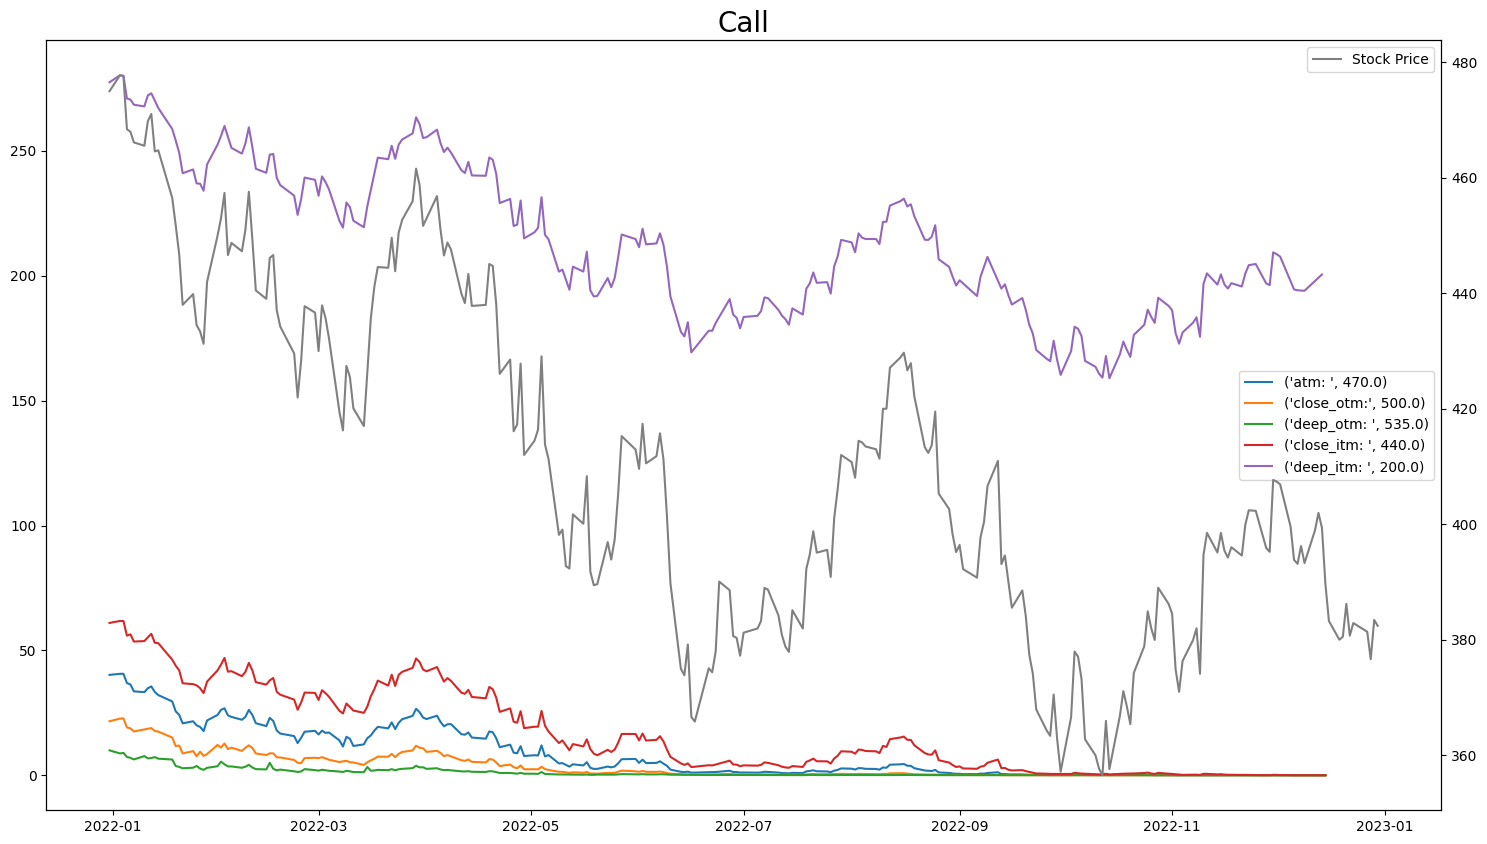

In [69]:
groups = [options_atm_groups,options_above_close_groups,options_above_far_groups,options_below_close_groups,options_below_far_groups]
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
for group in groups:
    for key, value in group:
        ax1.plot(value.QUOTE_TIME_EST,value.C_ASK)



# ax1.legend([list(i.groups.keys())[0] for i in groups],loc='center left')
ax1.legend(list(zip(['atm: ','close_otm:','deep_otm: ','close_itm: ','deep_itm: '],
                    [list(i.groups.keys())[0] for i in groups]))
           ,loc='center right')
plt.title('Call',size = 20)

ax2.plot(st_draw.DATE, st_draw.CLOSE, color = 'grey')
ax2.legend(['Stock Price'],loc='upper right')

fig.set_size_inches(18, 10, forward=True)

C:\Users\27270\AppData\Local\Temp\ipykernel_520\1090503833.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, value in group:


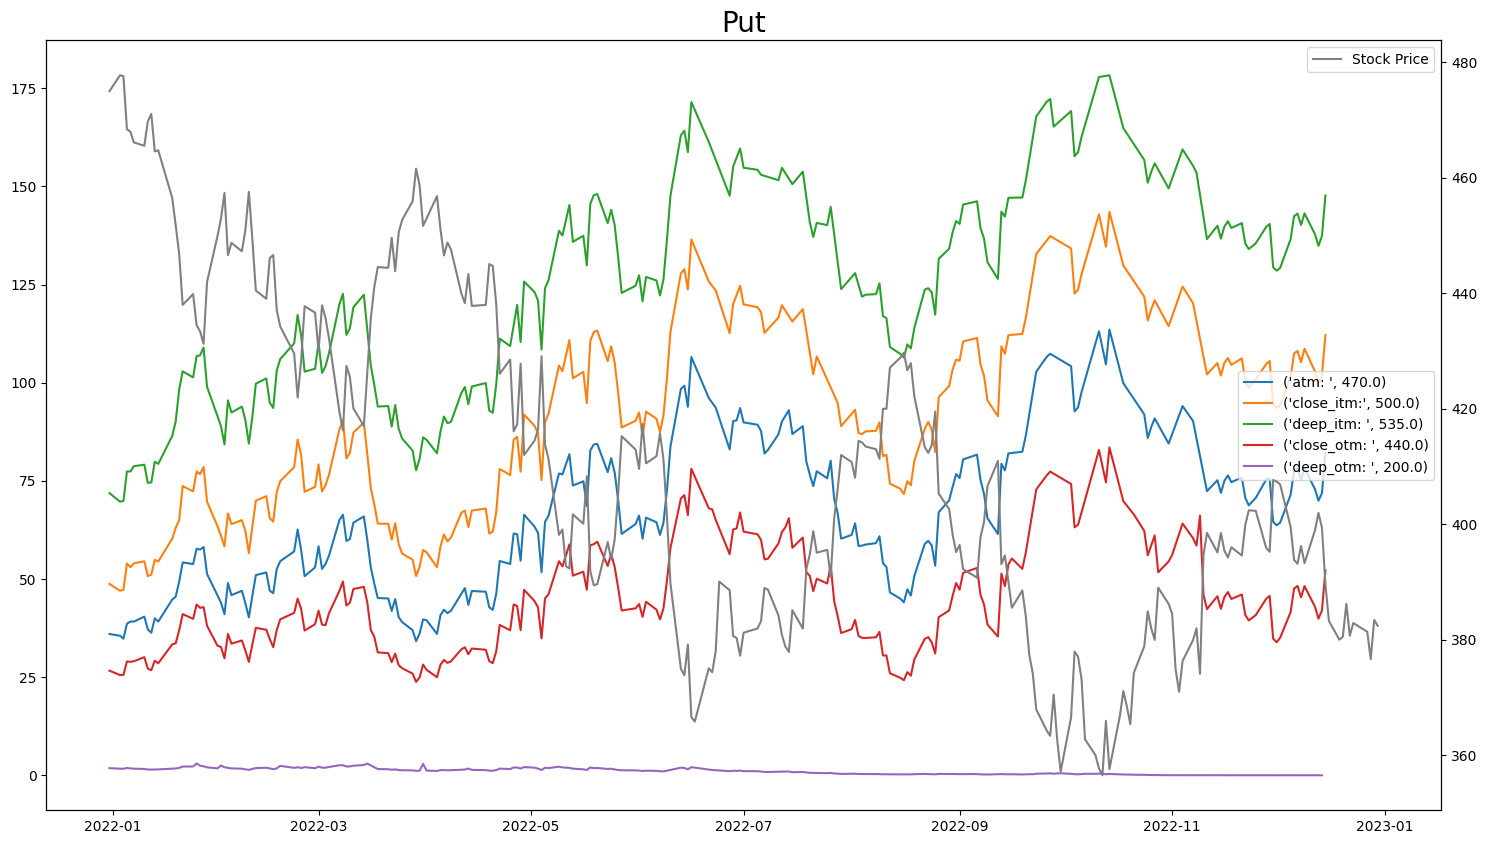

In [70]:
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
for group in groups:
    for key, value in group:
        ax1.plot(value.QUOTE_TIME_EST,value.P_ASK)

ax1.legend(list(zip(['atm: ','close_itm:','deep_itm: ','close_otm: ','deep_otm: '],
                    [list(i.groups.keys())[0] for i in groups]))
           ,loc='center right')

plt.title('Put',size = 20)

ax2.plot(st_draw.DATE, st_draw.CLOSE, color = 'grey')
ax2.legend(['Stock Price'],loc='upper right')

fig.set_size_inches(18, 10, forward=True)

C:\Users\27270\AppData\Local\Temp\ipykernel_5268\1184708332.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, value in group:


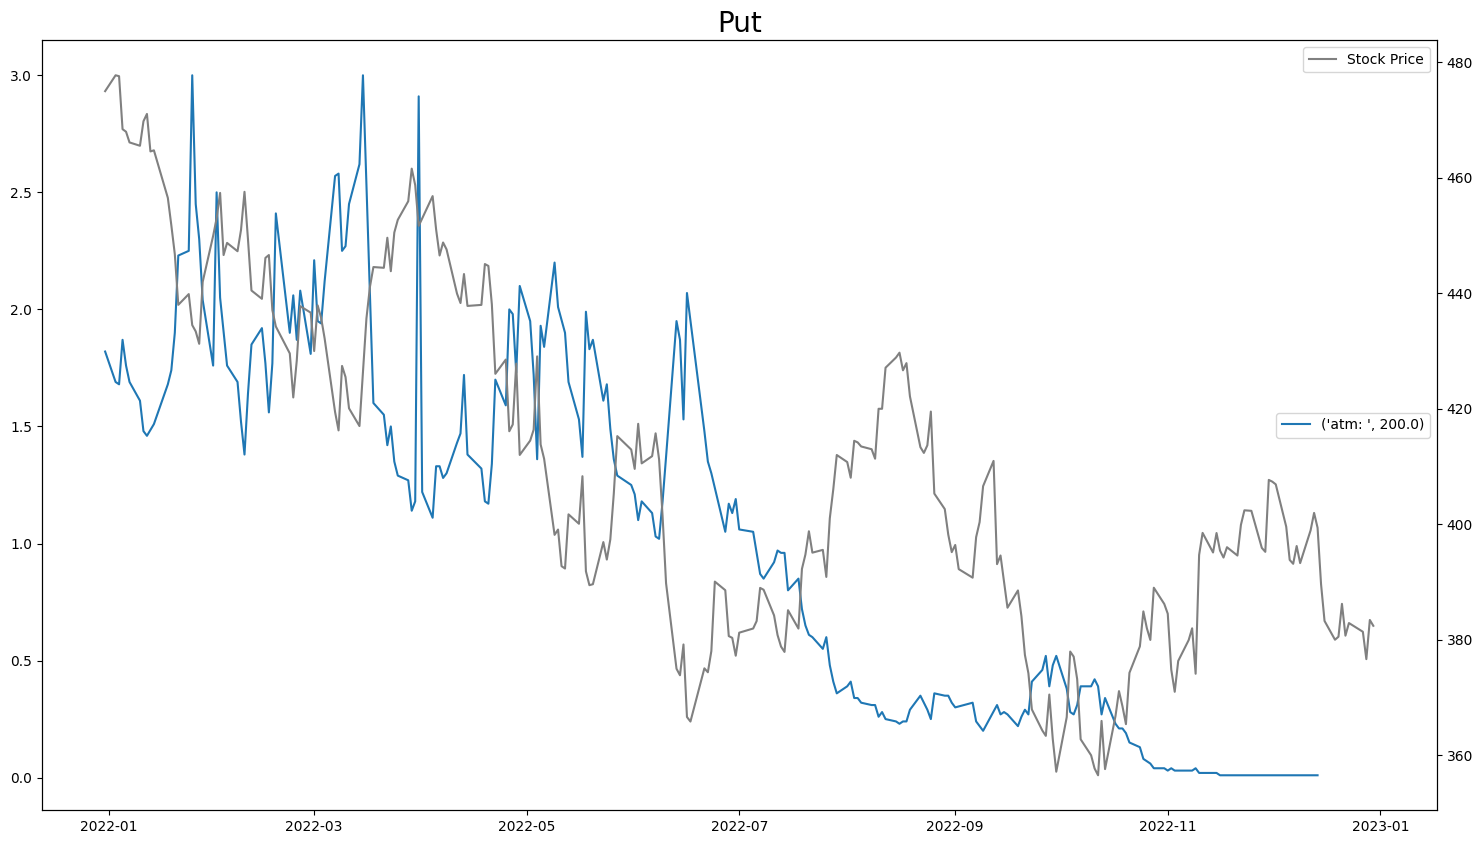

In [32]:
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
groups = [options_below_far_groups]
for group in groups:
    for key, value in group:
        ax1.plot(value.QUOTE_TIME_EST,value.P_ASK)

ax1.legend(list(zip(['atm: ','deep_otm: '],
                    [list(i.groups.keys())[0] for i in groups]))
           ,loc='center right')

plt.title('Put',size = 20)

ax2.plot(st_draw.DATE, st_draw.CLOSE, color = 'grey')
ax2.legend(['Stock Price'],loc='upper right')

fig.set_size_inches(18, 10, forward=True)



C:\Users\27270\AppData\Local\Temp\ipykernel_520\3146838047.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, value in group:


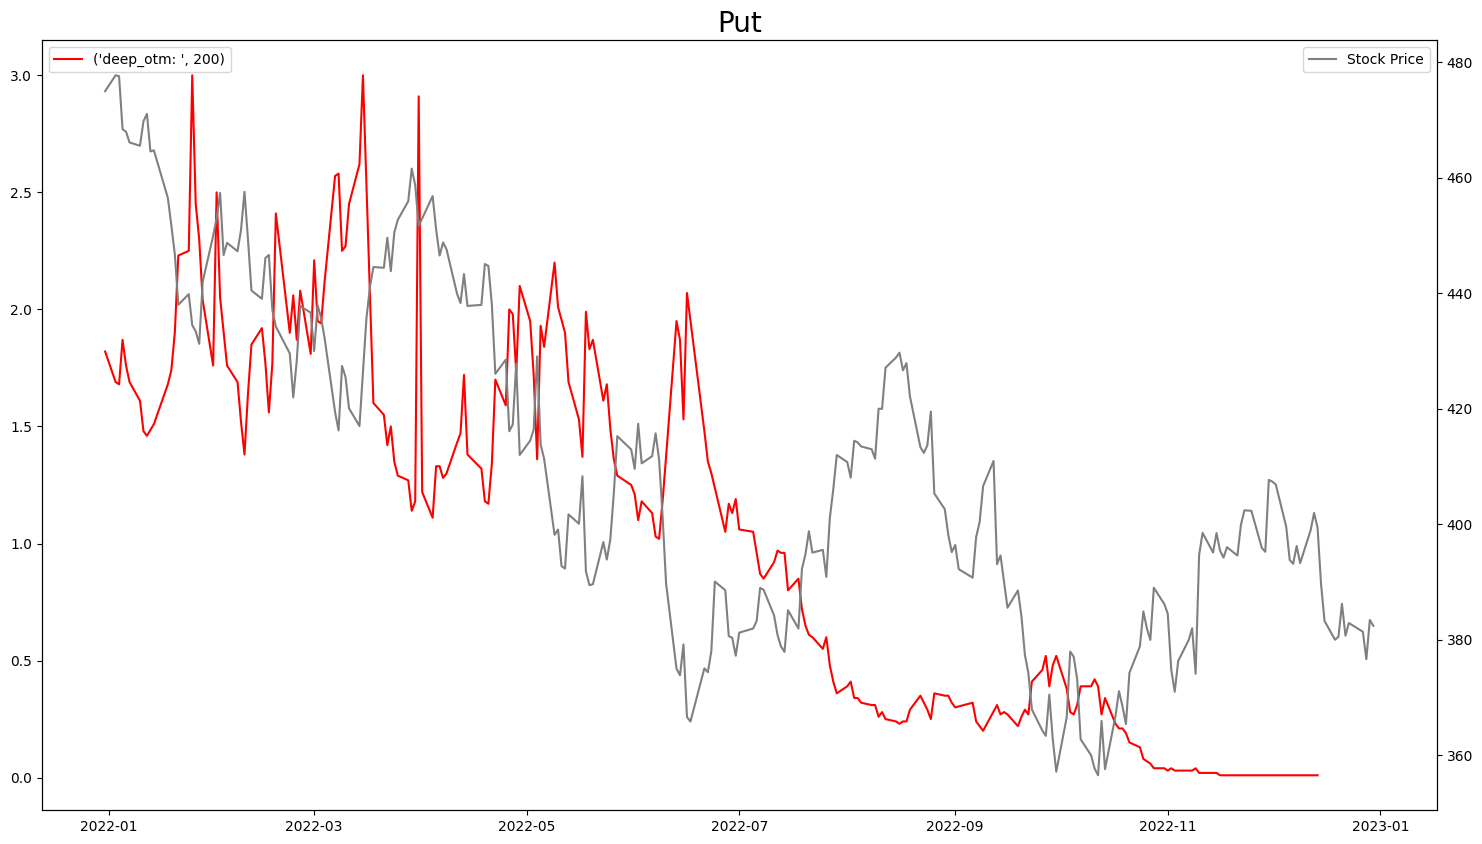

In [56]:
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
groups = [options_below_far_groups]
for group in groups:
    for key, value in group:
        ax1.plot(value.QUOTE_TIME_EST,value.P_ASK,color = 'r')

ax1.legend(list(zip(['deep_otm: '],
                    [200]))
           ,loc='upper left')

plt.title('Put',size = 20)

ax2.plot(st_draw.DATE, st_draw.CLOSE, color = 'grey')
ax2.legend(['Stock Price'],loc='upper right')

fig.set_size_inches(18, 10, forward=True)



# New Option Data

In [20]:
import gc
import os, glob

df = pd.DataFrame()
path = 'Options_Data\SPY'

for filename in glob.glob(os.path.join(path, '*.csv')):
    if filename[21:25] == '2022':
        _df = pd.read_csv(filename)
        df = pd.concat([df,_df],ignore_index = True)

C:\Users\27270\AppData\Local\Temp\ipykernel_520\1206769864.py:9: DtypeWarning: Columns (12,16) have mixed types. Specify dtype option on import or set low_memory=False.
  _df = pd.read_csv(filename)
C:\Users\27270\AppData\Local\Temp\ipykernel_520\1206769864.py:9: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  _df = pd.read_csv(filename)
C:\Users\27270\AppData\Local\Temp\ipykernel_520\1206769864.py:9: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  _df = pd.read_csv(filename)
C:\Users\27270\AppData\Local\Temp\ipykernel_520\1206769864.py:9: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  _df = pd.read_csv(filename)


In [27]:
df_put = df[df.PutCall == 'put']
df_put.columns

Index(['Symbol', 'ExpirationDate', 'AskPrice', 'AskSize', 'BidPrice',
       'BidSize', 'LastPrice', 'PutCall', 'StrikePrice', 'Volume',
       'OpenInterest', 'UnderlyingPrice', 'ImpliedVolatility', 'Delta',
       'Gamma', 'Vega', 'Rho', 'Theta', 'DataDate'],
      dtype='object')

In [28]:
df_put['ExpirationDate'] = pd.to_datetime(df_put['ExpirationDate'])
df_put['DataDate'] = pd.to_datetime(df_put['DataDate'])

C:\Users\27270\AppData\Local\Temp\ipykernel_520\2697727918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_put['ExpirationDate'] = pd.to_datetime(df_put['ExpirationDate'])
C:\Users\27270\AppData\Local\Temp\ipykernel_520\2697727918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_put['DataDate'] = pd.to_datetime(df_put['DataDate'])


In [35]:
df_put['DTE'] = (df_put['ExpirationDate'] - df_put['DataDate']).dt.days

C:\Users\27270\AppData\Local\Temp\ipykernel_520\3609649289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_put['DTE'] = (df_put['ExpirationDate'] - df_put['DataDate']).dt.days


In [39]:
df_put.head()

,Symbol,ExpirationDate,AskPrice,AskSize,BidPrice,BidSize,LastPrice,PutCall,StrikePrice,Volume,OpenInterest,UnderlyingPrice,ImpliedVolatility,Delta,Gamma,Vega,Rho,Theta,DataDate,DTE
62,SPY,2022-02-02,0.30,202,0.29,524,0.35,put,385.0,2,4,477.71,0.4533,-0.042,0.0014,0.1225,-0.017,-0.092,2022-01-03,30
63,SPY,2022-02-02,0.33,133,0.32,305,0.39,put,390.0,1,12,477.71,0.3517,-0.019,0.0010,0.0645,-0.008,-0.038,2022-01-03,30
64,SPY,2022-02-02,0.37,1286,0.35,422,0.42,put,395.0,40,17,477.71,0.3365,-0.021,0.0011,0.0705,-0.009,-0.039,2022-01-03,30
65,SPY,2022-02-02,0.40,191,0.39,158,0.41,put,400.0,13,17,477.71,0.3314,-0.027,0.0014,0.0863,-0.011,-0.047,2022-01-03,30
66,SPY,2022-02-02,0.45,1227,0.43,162,0.49,put,405.0,1,9,477.71,0.3083,-0.028,0.0015,0.0869,-0.011,-0.044,2022-01-03,30


In [41]:
df_put['key'] = df_put.apply(lambda x: (x.ExpirationDate, x.StrikePrice), axis = 1)

C:\Users\27270\AppData\Local\Temp\ipykernel_520\3129045180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_put['key'] = df_put.apply(lambda x: (x.ExpirationDate, x.StrikePrice), axis = 1)


In [60]:
key = (datetime.datetime(year = 2022, month = 12, day = 16), 200)

In [62]:
df_put_200 = df_put[df_put.key == (datetime.datetime(year = 2022, month = 12, day = 16), 200)]

In [63]:
df_put_200

,Symbol,ExpirationDate,AskPrice,AskSize,BidPrice,BidSize,LastPrice,PutCall,StrikePrice,Volume,...,UnderlyingPrice,ImpliedVolatility,Delta,Gamma,Vega,Rho,Theta,DataDate,DTE,key
3188,SPY,2022-12-16,1.68,443,1.65,9,1.69,put,200.0,48,...,477.71,0.5468,-0.028,0.0002,0.2965,-0.158,-0.023,2022-01-03,347,"(2022-12-16 00:00:00, 200.0)"
12584,SPY,2022-12-16,1.67,816,1.59,470,1.59,put,200.0,536,...,477.55,0.4852,-0.018,0.0002,0.2064,-0.099,-0.014,2022-01-04,346,"(2022-12-16 00:00:00, 200.0)"
22082,SPY,2022-12-16,1.87,25,1.75,619,1.78,put,200.0,286,...,468.38,0.4866,-0.020,0.0002,0.2212,-0.107,-0.015,2022-01-05,345,"(2022-12-16 00:00:00, 200.0)"
31414,SPY,2022-12-16,1.76,748,1.67,466,1.73,put,200.0,32,...,467.94,0.4821,-0.019,0.0002,0.2140,-0.103,-0.015,2022-01-06,344,"(2022-12-16 00:00:00, 200.0)"
40964,SPY,2022-12-16,1.66,27,1.60,10,1.65,put,200.0,23,...,466.09,0.4769,-0.019,0.0002,0.2079,-0.099,-0.014,2022-01-07,343,"(2022-12-16 00:00:00, 200.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221891,SPY,2022-12-16,0.01,4605,0.00,0,0.01,put,200.0,0,...,398.95,1.9734,-0.000,0.0000,0.0004,-0.0,-0.011,2022-12-12,4,"(2022-12-16 00:00:00, 200.0)"
2229561,SPY,2022-12-16,0.01,6341,0.00,0,0.01,put,200.0,5,...,401.97,3.3981,-0.008,0.0002,0.0078,-0.0,-0.439,2022-12-13,3,"(2022-12-16 00:00:00, 200.0)"
2237181,SPY,2022-12-16,0.01,8278,0.00,0,0.01,put,200.0,0,...,399.40,2.751,-0.000,0.0000,0.0003,-0.0,-0.018,2022-12-14,2,"(2022-12-16 00:00:00, 200.0)"
2244763,SPY,2022-12-16,0.01,5651,0.00,0,0.01,put,200.0,0,...,389.63,3.7648,-0.000,0.0000,0.0002,-0.0,-0.036,2022-12-15,1,"(2022-12-16 00:00:00, 200.0)"


C:\Users\27270\AppData\Local\Temp\ipykernel_520\1097712590.py:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, value in group:


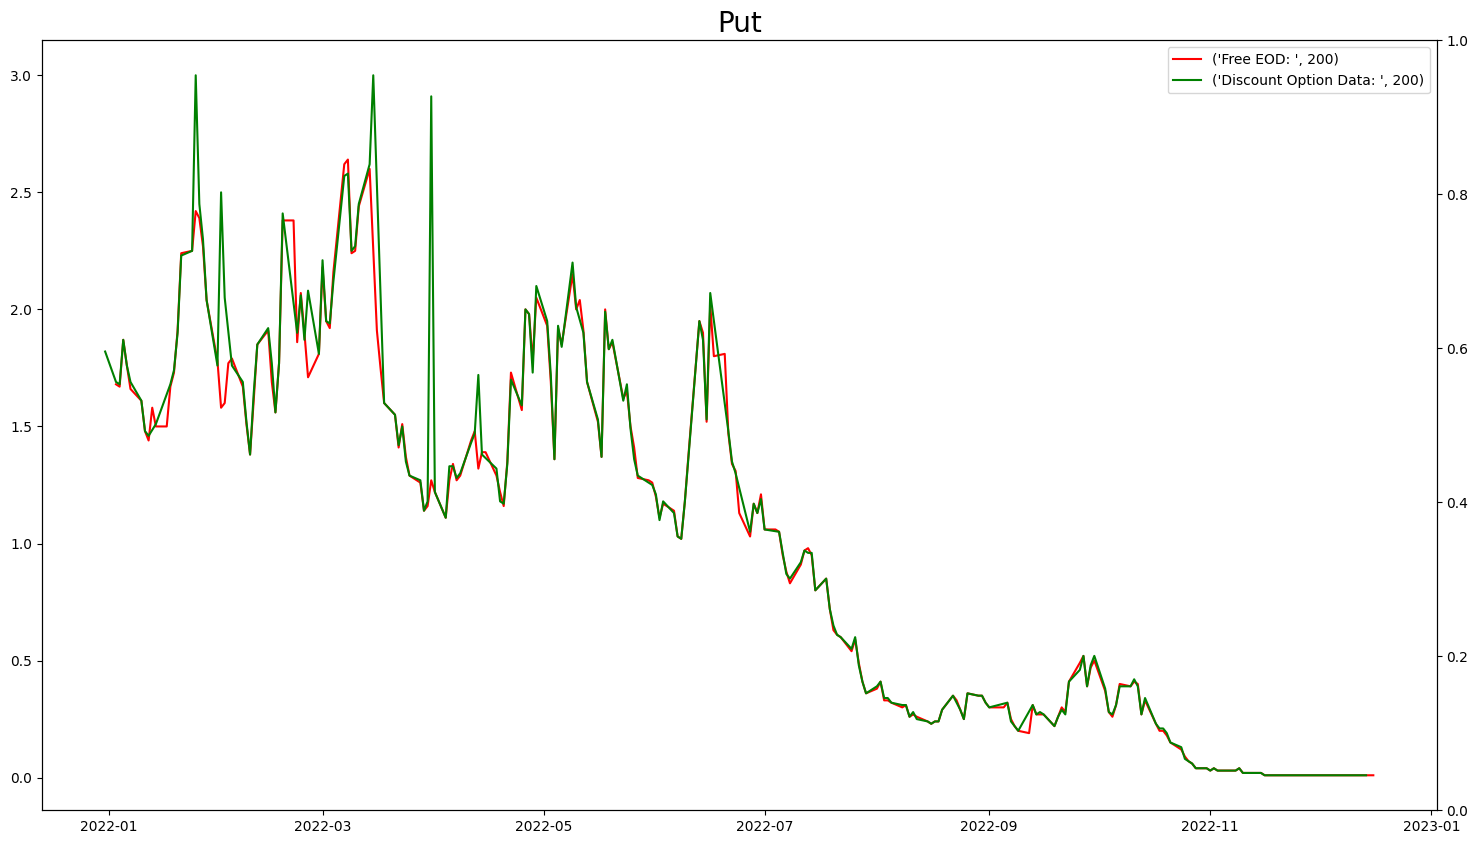

In [67]:
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(df_put_200.DataDate,df_put_200.AskPrice,color = 'r')
groups = [options_below_far_groups]
for group in groups:
    for key, value in group:
        ax1.plot(value.QUOTE_TIME_EST,value.P_ASK,color = 'g')

ax1.legend(list(zip(['Free EOD: ','Discount Option Data: '],
                    [200,200]))
           ,loc='upper right')

plt.title('Put',size = 20)

# ax2.plot(st_draw.DATE, st_draw.CLOSE, color = 'grey')
# ax2.legend(['Stock Price'],loc='upper right')

fig.set_size_inches(18, 10, forward=True)

In [78]:
options_atm_groups.values()

AttributeError: 'DataFrameGroupBy' object has no attribute 'values'

In [80]:
df_put_470 = df_put[df_put.key == (datetime.datetime(year = 2022, month = 12, day = 16), 470)]

C:\Users\27270\AppData\Local\Temp\ipykernel_520\3630262304.py:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, value in group:


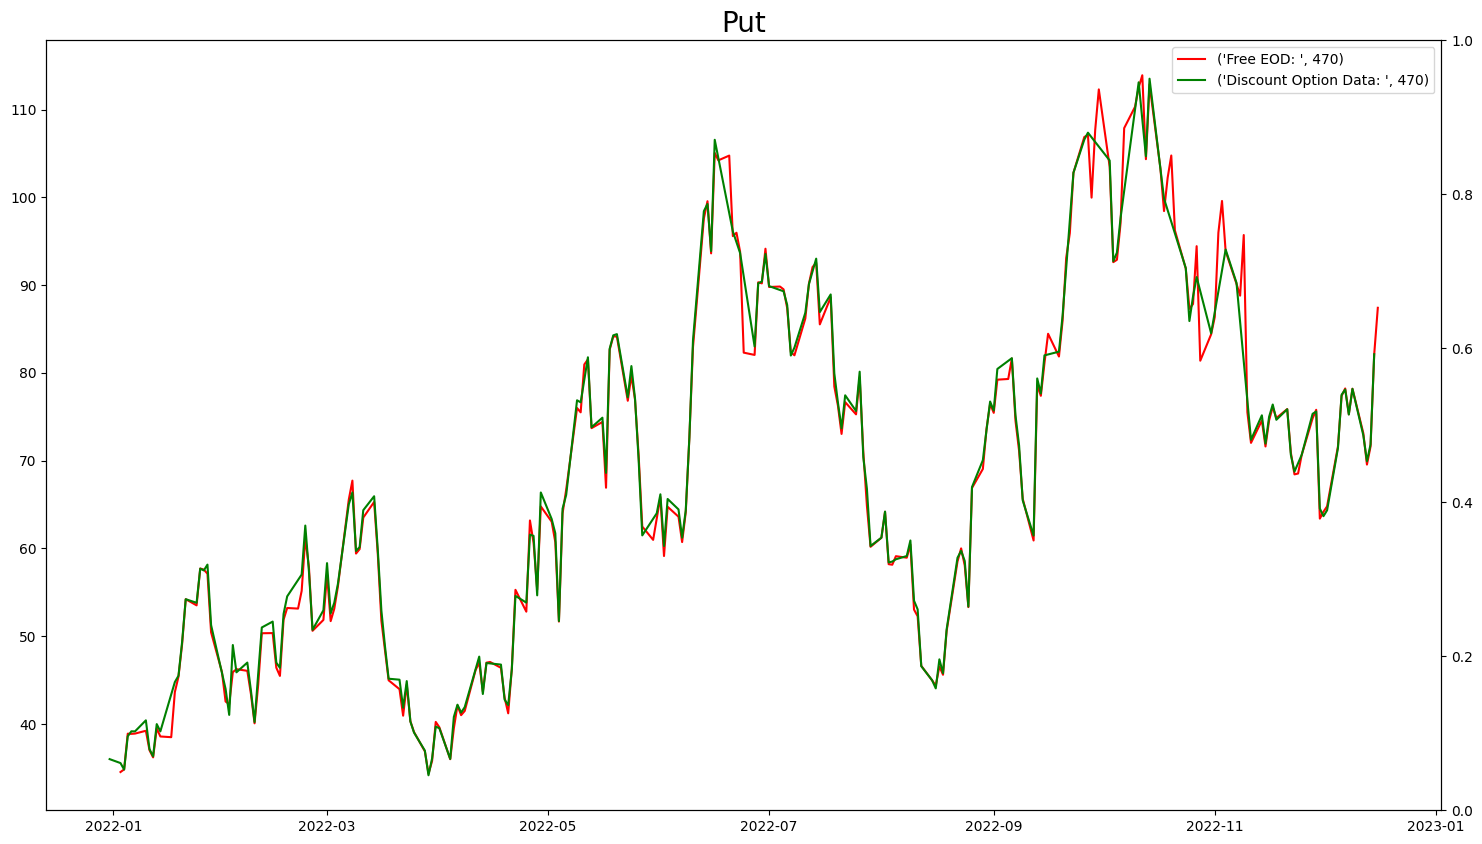

In [82]:
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(df_put_470.DataDate,df_put_470.AskPrice,color = 'r')
groups = [options_atm_groups]
for group in groups:
    for key, value in group:
        ax1.plot(value.QUOTE_TIME_EST,value.P_ASK,color = 'g')

ax1.legend(list(zip(['Free EOD: ','Discount Option Data: '],
                    [470,470]))
           ,loc='upper right')

plt.title('Put',size = 20)

# ax2.plot(st_draw.DATE, st_draw.CLOSE, color = 'grey')
# ax2.legend(['Stock Price'],loc='upper right')

fig.set_size_inches(18, 10, forward=True)